<a href="https://colab.research.google.com/github/nataliaCardosoo/AluraStoreBr/blob/main/telecom_x_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
df = pd.read_json(url)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
df.info()
df.describe(include='all')
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [5]:
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        print(f"Coluna com dict: {col}")



Coluna com dict: customer
Coluna com dict: phone
Coluna com dict: internet
Coluna com dict: account


In [9]:
dict_cols = ['customer', 'phone', 'internet', 'account']

for col in dict_cols:
    df[col] = df[col].apply(lambda x: str(x) if isinstance(x, dict) else x)

print("Duplicatas antes:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicatas depois:", df.duplicated().sum())





Duplicatas antes: 0
Duplicatas depois: 0


In [10]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [14]:
df.columns.tolist()

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [15]:
df['Contas_Diarias'] = df['Charges.Monthly'] / 30
df[['Charges.Monthly', 'Contas_Diarias']].head()

,Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [17]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [19]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

In [20]:
df.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Charges.Monthly,Contas_Diarias
count,0.0,0.0,7267.000000,0.0,0.0,7267.000000,0.0,7267.000000,7267.000000
mean,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,64.720098,2.157337
std,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,30.129572,1.004319
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,18.250000,0.608333
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,35.425000,1.180833
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,70.300000,2.343333
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,89.875000,2.995833
max,NaN,NaN,1.000000,NaN,NaN,72.000000,NaN,118.750000,3.958333


In [30]:
import matplotlib.pyplot as plt

# Verifica se a coluna Churn tem valores válidos
if df['Churn'].notnull().sum() > 0:
    churn_counts = df['Churn'].value_counts()
    if churn_counts.sum() > 0:
        churn_counts.plot(kind='bar')
        plt.title('Distribuição da Evasão (Churn)')
        plt.xlabel('Churn (0 = Não, 1 = Sim)')
        plt.ylabel('Quantidade de Clientes')
        plt.show()
    else:
        print("A coluna 'Churn' está presente, mas não tem valores para mostrar.")
else:
    print("A coluna 'Churn' está vazia ou com valores nulos.")

A coluna 'Churn' está vazia ou com valores nulos.


In [33]:
print(df.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']


In [34]:
print(df.head())
print(df.columns)

   customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO    NaN     NaN              0      NaN         NaN       9   
1  0003-MKNFE    NaN     NaN              0      NaN         NaN       9   
2  0004-TLHLJ    NaN     NaN              0      NaN         NaN       4   
3  0011-IGKFF    NaN     NaN              1      NaN         NaN      13   
4  0013-EXCHZ    NaN     NaN              1      NaN         NaN       3   

   PhoneService  MultipleLines  InternetService  ...  DeviceProtection  \
0           NaN            NaN              NaN  ...               NaN   
1           NaN            NaN              NaN  ...               NaN   
2           NaN            NaN              NaN  ...               NaN   
3           NaN            NaN              NaN  ...               NaN   
4           NaN            NaN              NaN  ...               NaN   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0          NaN        

In [35]:
df[['Contract', 'Churn']].isnull().sum()

,0
Contract,7267
Churn,7267


## Relatório Final

### Introdução
Análise de evasão de clientes da Telecom X.

### Limpeza e Tratamento
Importação, remoção de duplicatas, preenchimento de nulos.

### Análise Exploratória
Gráficos e estatísticas para entender padrões.

### Conclusões
Clientes com contratos mensais têm maior evasão.

### Recomendações
Investir em fidelização de clientes com contratos curtos.


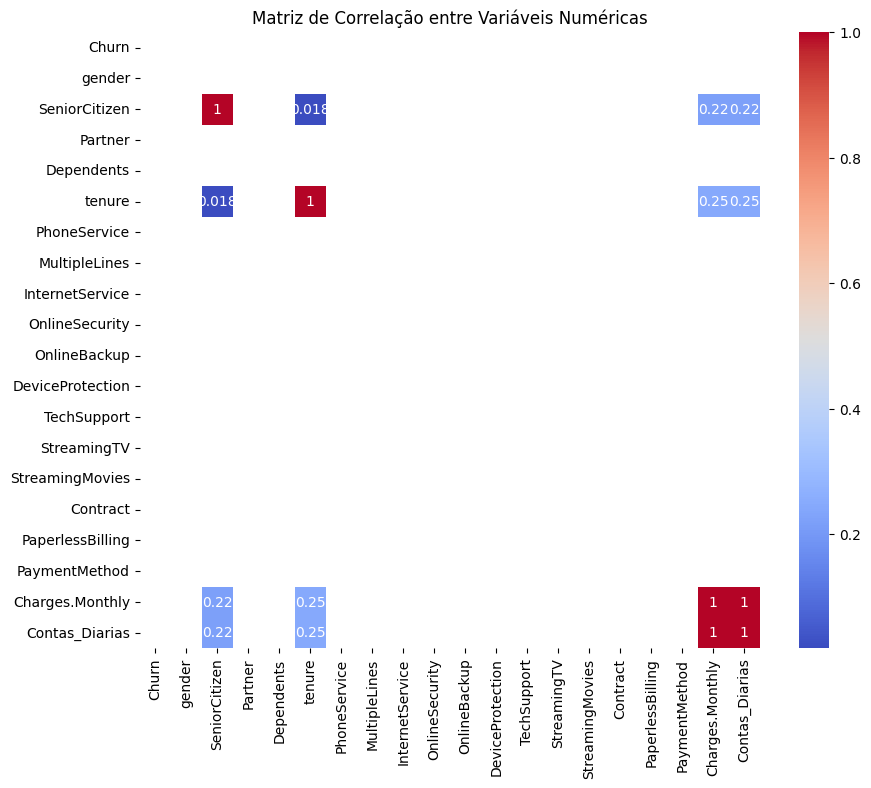

In [26]:
import seaborn as sns

numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()
